<a href="https://colab.research.google.com/github/Finger228/Health-Insurance-Dataset/blob/master/HID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Health Insurance Dataset

Task:
- Build a model that predicts "charges" for a given person based on their features.
- Evaluate the quality of your model.
- Identify the factors with the highest impact.

Expected result - link to a GitHub repo with:
- Code for the solution (any programming language, Python or R preferred).
- Brief summary of the solution*: what did you do, which steps did you make, how to interpret the results.

# **Preparing data**

### download data from github repo

I load dataset to github repo, so you can easily download it to colab. Let's check length and first fields of given dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/Finger228/Health-Insurance-Dataset/master/insurance.csv'
data = pd.read_csv(url)
print(len(data))
data.head()

1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### preparing data

First of all lets identify missing values in given dataset.


In [2]:
from sklearn.preprocessing import OneHotEncoder

# checking for miss values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


As you can see there no any NaN values.

---

Now we should handle categorical data. I use *get_dummies* function for that purpose. Than we can see how the features are correlated.

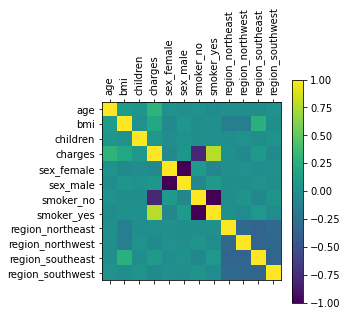

In [3]:
df = pd.get_dummies(data)

# some data vizualizing
plt.matshow(df.corr())
plt.xticks(np.arange(12), df.columns, rotation=90)
plt.yticks(np.arange(12), df.columns, rotation=0)
plt.colorbar()
plt.show()


We interested in correlation of charges. As we can see, most impact value is smoker column. We will confirm it in future by training model.

### normalize data

Let's bring features onto the same scale. I use normalization, or min-max scaling. 

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_norm = mms.fit_transform(df)
print(df_norm)


[[0.02173913 0.3212268  0.         ... 0.         0.         1.        ]
 [0.         0.47914985 0.2        ... 0.         1.         0.        ]
 [0.2173913  0.45843422 0.6        ... 0.         1.         0.        ]
 ...
 [0.         0.56201238 0.         ... 0.         1.         0.        ]
 [0.06521739 0.26472962 0.         ... 0.         0.         1.        ]
 [0.93478261 0.35270379 0.         ... 1.         0.         0.        ]]


# **Train and test datasets**

Given dataset not large, so I chouce 80:20 split for train and test datasets. You can experiment with different features for predicting charges. Smoker feature is most impact, so we can compare model train by only smoker feature with model train by all features. There is examples of different train and test datasets.

### train by all features

In [20]:
from sklearn.model_selection import train_test_split
X, y = df.drop(columns=['charges']).values, df.iloc[:, 3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[0]

array([46.  , 19.95,  2.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ])

### train by smoker feature

In [24]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, 6:8].values, df.iloc[:, 3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[0]

array([1, 0], dtype=uint8)

### train by all features without smoker

In [46]:
from sklearn.model_selection import train_test_split
X, y = df.drop(columns=['charges', 'smoker_no', 'smoker_yes']).values, df.iloc[:, 3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[0]

array([46.  , 19.95,  2.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ])

# **Predictive model**

We need to predict numerical variable(charges), so we need a regression model. I use Multiple Linear Regression because of we have more than one independent variable.

### Standard linear regression

Ordinary least squares Linear Regression.

Score:  0.7835929767120723
Weights:  [ 2.56975706e+02  3.37092552e+02  4.25278784e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]


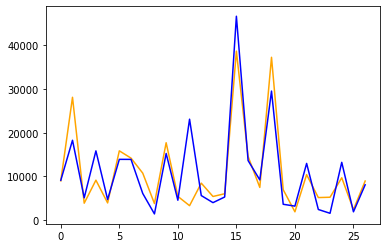

In [6]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Score: ', regr.score(X_test, y_test))
print('Weights: ', regr.coef_)

plt.plot(regr.predict(X_test[::10]), color="orange")
plt.plot(y_test[::10], color="blue")
plt.show()

### ridge regression

least squares Linear Regression with l2 regularization.

Score:  0.7835857633162266
Weights:  [ 2.56970873e+02  3.37087884e+02  4.25285695e+02  9.19575435e+00
 -9.19575435e+00 -1.18238536e+04  1.18238536e+04  4.59519087e+02
  8.88111587e+01 -1.98110226e+02 -3.50220020e+02]


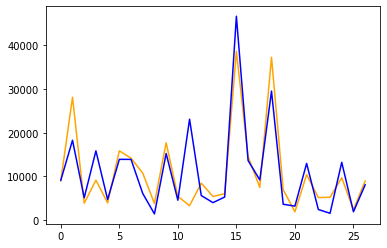

In [7]:
from sklearn import linear_model

regr = linear_model.Ridge (alpha = .05)
regr.fit(X_train, y_train)
print('Score: ', regr.score(X_test, y_test))
print('Weights: ', regr.coef_)

plt.plot(regr.predict(X_test[::10]), color="orange")
plt.plot(y_test[::10], color="blue")
plt.show()

Example models trained by all features 

---


### As we can see, weights of **smoker features** give the most impact in models.

---

To get a better idea of the actual results, let's split the data over and over again to get different models and get the average of their scores. Train and test model with only smoker feature.

In [25]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle= True)
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))
    coefs.append(regr.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle= True)
    regr = linear_model.Ridge (alpha = .5)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))
    coefs.append(regr.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
0.614475956281975
[-3.900563e+15 -3.900563e+15]

Ridge Regression
0.6161222026412081
[-11785.62973414  11785.62973414]


### Compare models train by datasets consists of all features and without smoker feature

Score:  0.6986481931197364
Weights:  [ 2.56291776e+02  3.36903400e+02  4.40743571e+02  1.55068123e+02
 -1.55068123e+02 -1.19979221e+04  1.19979221e+04  4.28007867e+02
  1.93164580e+01 -4.42671947e+02 -4.65237766e+00]


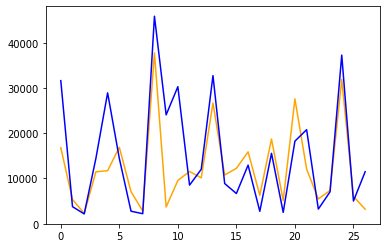

Score:  0.05090069747046133
Weights:  [ 261.40366946  316.76763062  616.76739514 -524.12670001  524.12670001
  856.26875035 -993.21145505  744.64069272 -607.69798802]


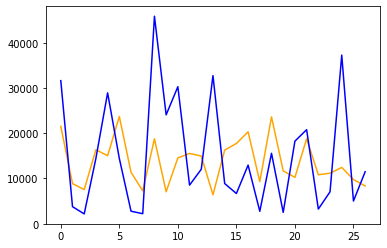

In [18]:
from sklearn import linear_model

X, y = df.drop(columns=['charges']).values, df.iloc[:, 3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=322)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Score: ', regr.score(X_test, y_test))
print('Weights: ', regr.coef_)

plt.plot(regr.predict(X_test[::10]), color="orange")
plt.plot(y_test[::10], color="blue")
plt.show()


X, y = df.drop(columns=['charges', 'smoker_no', 'smoker_yes']).values, df.iloc[:, 3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=322)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Score: ', regr.score(X_test, y_test))
print('Weights: ', regr.coef_)

plt.plot(regr.predict(X_test[::10]), color="orange")
plt.plot(y_test[::10], color="blue")
plt.show()

# **Test result**

You can test model by your numbers:

In [12]:
regr.predict([[60, 28, 0, 1, 0, 0, 1, 0, 0,	0, 1]])

array([35764.31870714])

# **Summary**

In final, we have model with score ~75% that can predict charges by all given features. As an alternative, we also have model with score ~60% that can predict charges only by smoker feature. 